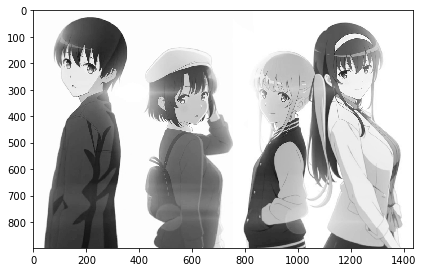

In [27]:
from skimage import io,util
import matplotlib.pyplot as plt
import numpy as np

'''
鹽和胡椒雜訊
'''
b = io.imread('anime.jpg')
gn= util.noise.random_noise(b,mode ='s&p')
gn2= util.noise.random_noise(b,mode ='s&p',amount = 0.2)
gn4= util.noise.random_noise(b,mode ='s&p',amount = 0.4)
fig = plt.figure()
io.imshow(b)


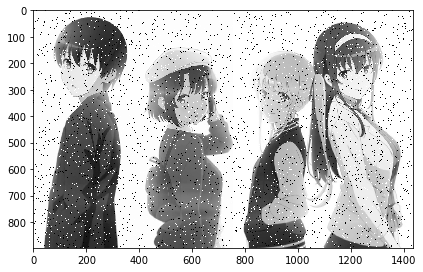

In [28]:
fig = plt.figure()
io.imshow(gn)

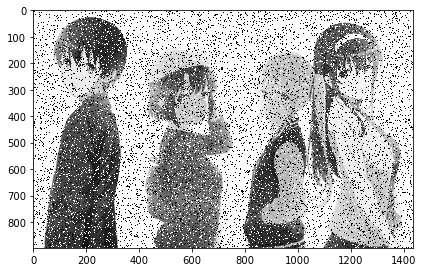

In [29]:
fig = plt.figure()
io.imshow(gn2)

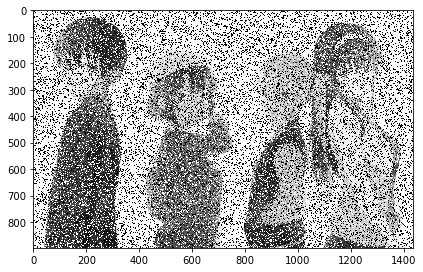

In [30]:
fig = plt.figure()
io.imshow(gn4)

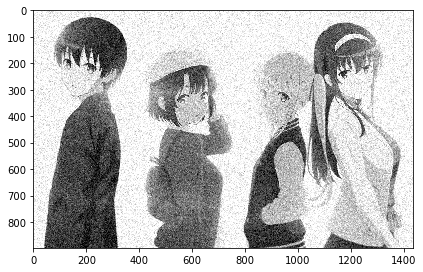

In [31]:
'''
高斯雜訊
'''
gnn= util.noise.random_noise(b,mode ='gaussian')

fig = plt.figure()
io.imshow(gnn)

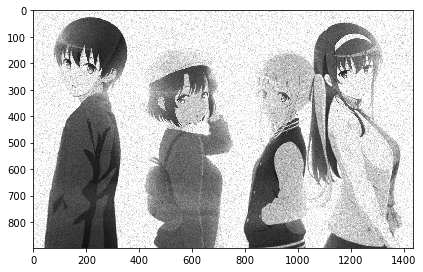

In [32]:
'''
斑點雜訊: 又稱為乘積雜訊
(照超音波時 容易出現 , 因為有相位差)
'''
gnr= util.noise.random_noise(b,mode ='speckle')
io.imshow(gnr)

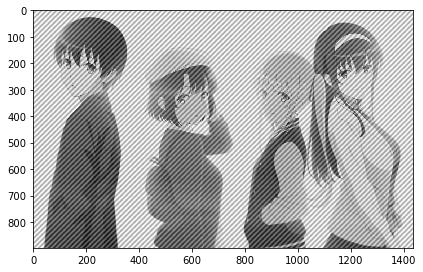

In [33]:
'''
週期性雜訊
'''
r,c = b.shape
x,y =np.mgrid[0:r,0:c].astype('float32')
p= np.sin(x/3+y/3)+1.0
gp= (2*util.img_as_float(b)+p/2)/3
io.imshow(gp)

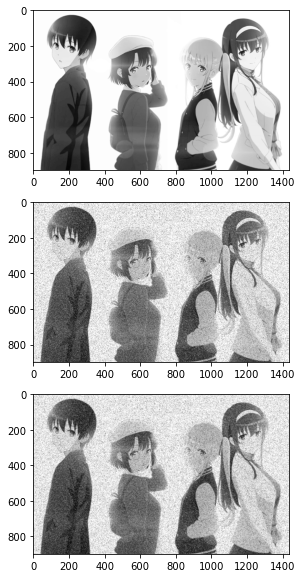

In [34]:
'''
去除 鹽和胡椒
用低通平均濾波
'''
import scipy.ndimage as ndi

bn= util.noise.random_noise(b,mode ='s&p',amount = 0.2)
brn = ndi.uniform_filter(bn,3)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
ax1.imshow(b,cmap='gray')
ax2 = fig.add_subplot(312)
ax2.imshow(bn,cmap='gray')
ax3 = fig.add_subplot(313)
ax3.imshow(brn,cmap='gray')

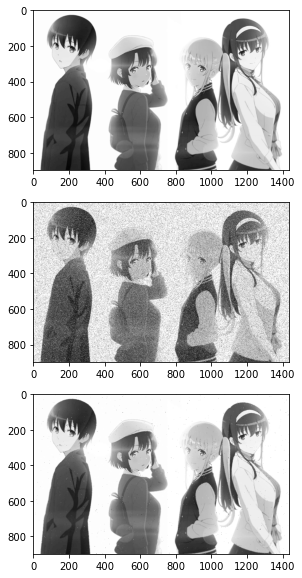

In [35]:
'''
去除 鹽和胡椒
用中位數濾波
'''
bn= util.noise.random_noise(b,mode ='s&p',amount = 0.2)
brn = ndi.median_filter(bn,3)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
ax1.imshow(b,cmap='gray')
ax2 = fig.add_subplot(312)
ax2.imshow(bn,cmap='gray')
ax3 = fig.add_subplot(313)
ax3.imshow(brn,cmap='gray')
plt.show()

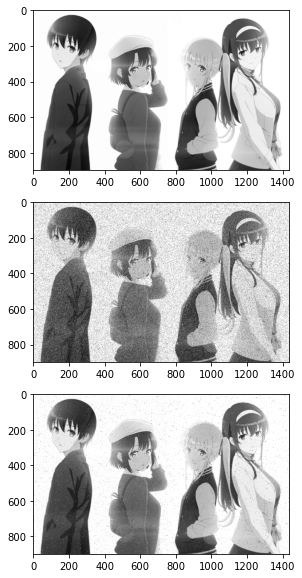

In [36]:
'''
去除 鹽和胡椒
用排序濾波
'''
bn= util.noise.random_noise(b,mode ='s&p',amount=0.2)
cross =np.array([[0,1,0],[1,1,1],[0,1,0]])
brn = ndi.median_filter(bn,footprint=cross)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
ax1.imshow(b,cmap='gray')
ax2 = fig.add_subplot(312)
ax2.imshow(bn,cmap='gray')
ax3 = fig.add_subplot(313)
ax3.imshow(brn,cmap='gray')
plt.show()



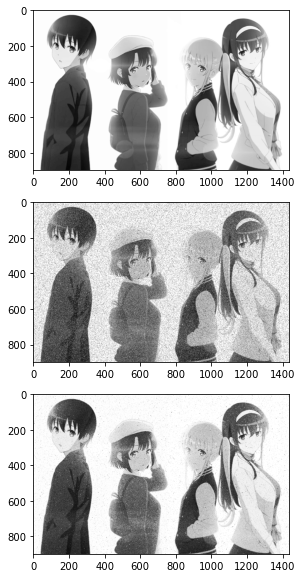

In [37]:
'''
歧異點方法:
1.選一個閥值
2.超過閥值就判定為噪點
3.把噪點用平均值代替
效果不會比MEDIAN好 但快很多
'''
bn= util.noise.random_noise(b,mode ='s&p',amount=0.2)
#除了中間點 做平均
ave =np.array([[1,1,1],[1,0,1],[1,1,1]])/8.0
bnave= ndi.convolve(bn,ave)
#給閥值
D=0.5
#中間點超出平均值太多該點就會變成 1(噪點的地方)  其他地方設為0
r = (abs(bn-bnave)>D)*1.0
#r是1的地方(差太多)就取平均值  不是就取原來值
brn=r*bnave+(1-r)*bn
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
ax1.imshow(b,cmap='gray')
ax2 = fig.add_subplot(312)
ax2.imshow(bn,cmap='gray')
ax3 = fig.add_subplot(313)
ax3.imshow(brn,cmap='gray')
plt.show()

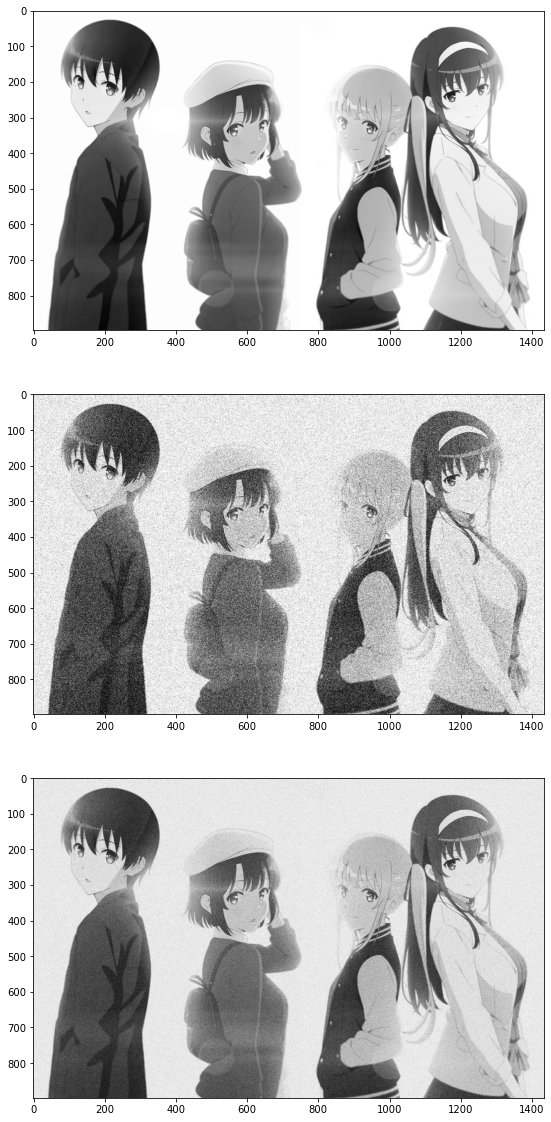

In [38]:
'''
去除高斯雜訊
用很多張照片對同一點做平均(每一張noise不固定 取很多張時noise趨近0)
'''
r,c = b.shape
#取10張
num_img =10
bn = np.zeros((r,c,num_img))
for i in range(num_img):
    bn[:,:,i] = util.noise.random_noise(b,mode ='gaussian',mean=0,var=0.05)
#對每張的同一點做平均運算
brn= np.mean(bn,axis = 2)
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(311)
ax1.imshow(b,cmap='gray')
ax2 = fig.add_subplot(312)
ax2.imshow(bn[:,:,0],cmap='gray')
ax3 = fig.add_subplot(313)
ax3.imshow(brn,cmap='gray')
plt.show()

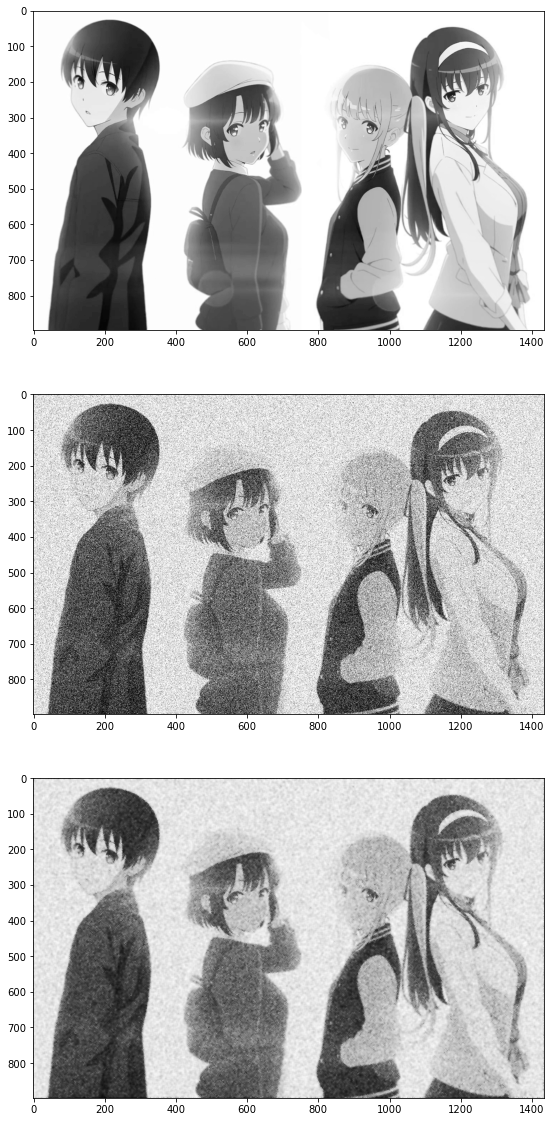

In [39]:
'''
可適性濾波器:
會隨著遮罩下的灰階值改變其特性的濾波器
'''
'''
Wiener 濾波器(一種改良的可適性濾波器)
複雜度變化量不夠的取零就好
'''
from scipy.signal import wiener

bn = util.noise.random_noise(b,mode ='gaussian',var=0.1)
brn = wiener(bn,[7,7])
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(311)
ax1.imshow(b,cmap='gray')
ax2 = fig.add_subplot(312)
ax2.imshow(bn,cmap='gray')
ax3 = fig.add_subplot(313)
ax3.imshow(brn,cmap='gray')
plt.show()

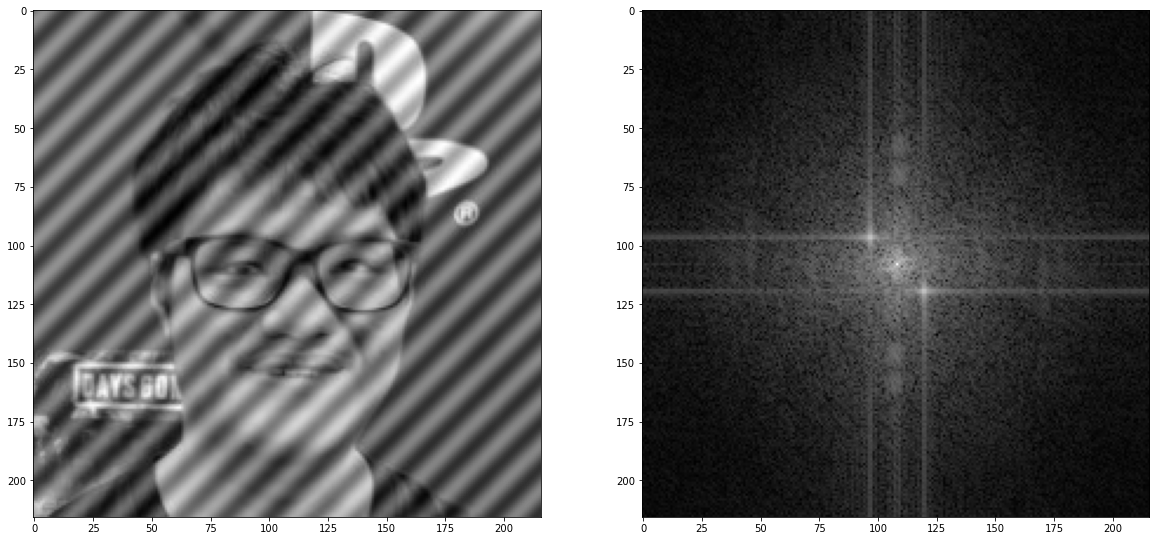

In [40]:
from numpy.fft import *
from skimage import io,util, exposure

b = io.imread('davidFace(square).jpg')
r,c = b.shape

x,y =np.mgrid[0:r,0:c].astype('float32')
p= np.sin(x/3+y/3)+1.0
gp= (2*util.img_as_float(b)+p/2)/3
#gp:
gpf = fftshift(fft2(gp))
gpf1 = exposure.rescale_intensity(np.log(1+abs(gpf)), out_range=(0.0, 1.0))
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(121)
ax1.imshow(gp,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(gpf1,cmap='gray')
plt.show()


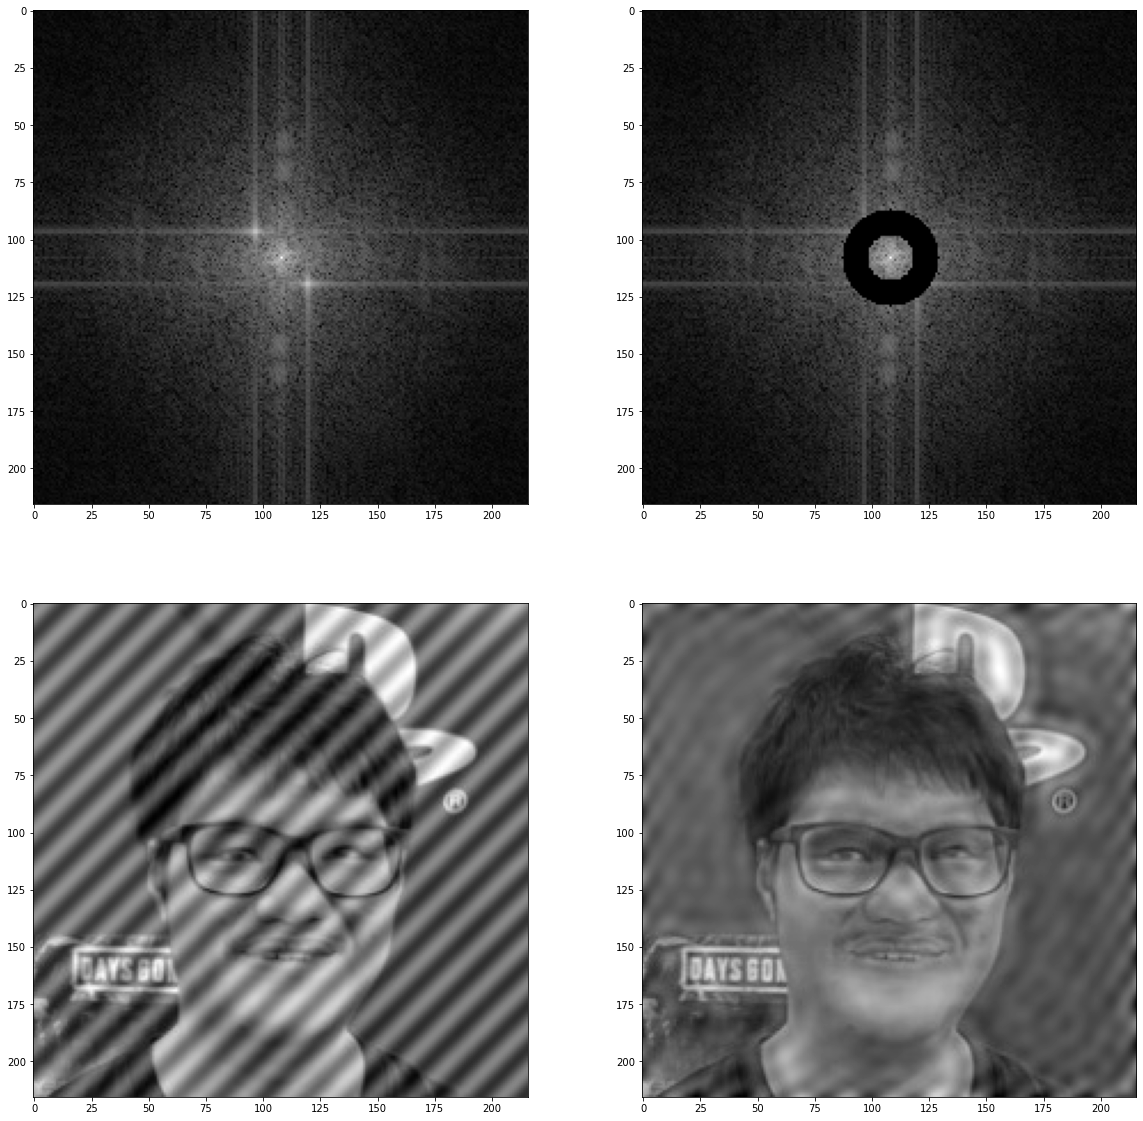

In [41]:
''''
把波紋造成的傅立葉係數歸零
'''
r,c = b.shape
x,y =np.mgrid[0:r,0:c].astype('float32')
p= np.sin(x/3+y/3)+1.0
gp= (2*util.img_as_float(b)+p/2)/3
gpf = fftshift(fft2(gp))
z=np.sqrt((x-108)**2+(y-108)**2)
d= np.sqrt(250)
k=5

#條件成立設為一
br = (z<np.floor(d-k)) | (z>np.ceil(d+k))

pr = np.abs(ifft2(gpf*br))
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(221)
ax1.imshow(exposure.rescale_intensity(np.log(1+abs(gpf)), out_range=(0.0, 1.0)),cmap='gray')
ax2 = fig.add_subplot(222)
ax2.imshow(exposure.rescale_intensity(np.log(1+abs(gpf*br)), out_range=(0.0, 1.0)),cmap='gray')
ax1 = fig.add_subplot(223)
ax1.imshow(gp,cmap='gray')
ax2 = fig.add_subplot(224)
ax2.imshow(pr,cmap='gray')
plt.show()


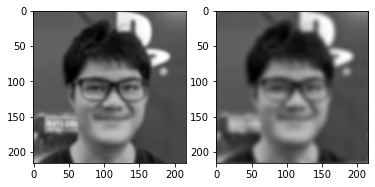

In [42]:

#h= util.noise.random_noise(b,mode ='gaussian')
h = ndi.gaussian_filter(b,2,truncate = 4)
r,c = h.shape
x,y =np.mgrid[-c/2:c/2,-r/2:r/2].astype('float32')
bworth = 1./(1+(np.sqrt(2)-1)*((x**2+y**2) /15**2)**2)
hf = fftshift(fft2(h))
hw=hf*bworth
hwa = np.abs(ifft2(hw))
blur = util.img_as_ubyte(exposure.rescale_intensity(hwa,out_range=(0.0,1.0)))
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(h,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(blur,cmap='gray')
plt.show()

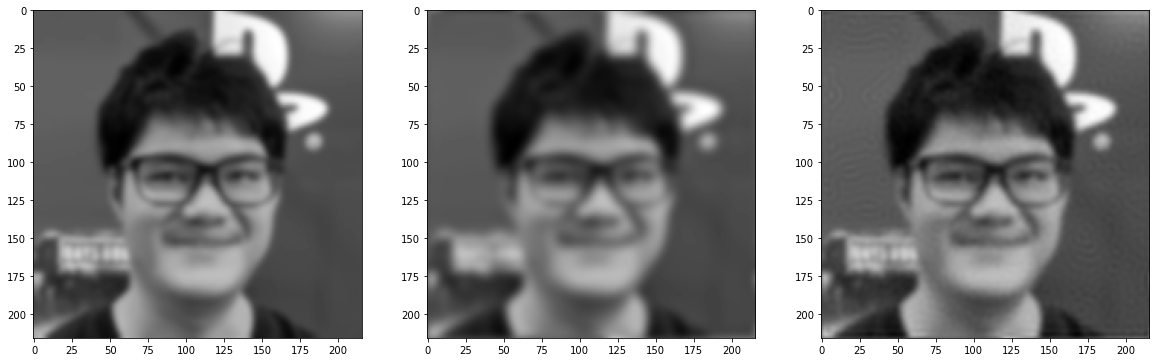

In [43]:
blf = fftshift(fft2(blur))
D=40
bworth2=1./(1+(np.sqrt(2)-1)*((x**2+y**2) /D**2)**10)
blfb = blf/bworth *bworth2
ba = np.abs(ifft2(blfb))
rh = util.img_as_ubyte(exposure.rescale_intensity(ba,out_range=(0.0,1.0)))

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(131)
ax1.imshow(h,cmap='gray')
ax2 = fig.add_subplot(132)
ax2.imshow(blur,cmap='gray')
ax3 = fig.add_subplot(133)
ax3.imshow(rh,cmap='gray')
plt.show()

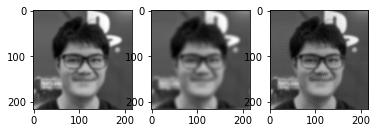

In [44]:
'''
除式設限反轉濾波
'''
d=0.01
bw= np.copy(bworth)
bw[np.where(bw<d)]=1
fbw= fftshift(fft2(blur))/bw
ba = np.abs(ifft2(fbw))
rh = util.img_as_ubyte(exposure.rescale_intensity(ba,out_range=(0.0,1.0)))

fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.imshow(h,cmap='gray')
ax2 = fig.add_subplot(132)
ax2.imshow(blur,cmap='gray')
ax3 = fig.add_subplot(133)
ax3.imshow(rh,cmap='gray')
plt.show()


In [45]:
'''
去除動態模糊
'''

'''
from skimage import io
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np
cr = io.imread('motionBlur.png')
m= np.ones((1,7))/7
cm = ndi.correlate(cr,m)
m2 = np.zeros((256,256))
m2[0,0:7]=m
mf = fft2(m2)
'''

"\nfrom skimage import io\nimport scipy.ndimage as ndi\nimport matplotlib.pyplot as plt\nimport numpy as np\ncr = io.imread('motionBlur.png')\nm= np.ones((1,7))/7\ncm = ndi.correlate(cr,m)\nm2 = np.zeros((256,256))\nm2[0,0:7]=m\nmf = fft2(m2)\n"

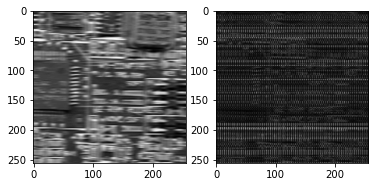

In [46]:
from skimage import io,util, exposure
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from numpy.fft import *
import numpy as np
from skimage.color import rgb2gray
cr = io.imread('motionBlur.png')
cr = rgb2gray(cr)
m= np.ones((1,7))/7
cm = ndi.correlate(cr,m)
m2 = np.zeros((256,256))
m2[0,0:7]=m
mf = fft2(m2)
bmi = np.abs(ifft2(fft2(cm)/mf))
rm = util.img_as_ubyte(exposure.rescale_intensity(bmi,out_range=(0.0,1.0)))
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(cm,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(rm,cmap='gray')
plt.show()



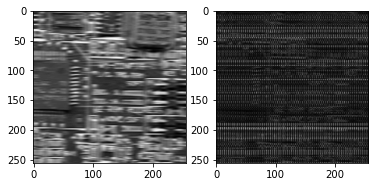

In [47]:
'''
直接除法去除動態模糊
'''
m= np.ones((1,7))/7
cm = ndi.correlate(cr,m)
m2 = np.zeros((256,256))
m2[0,0:7]=m
mf = fft2(m2)
bmi = np.abs(ifft2(fft2(cm)/mf))
rm = util.img_as_ubyte(exposure.rescale_intensity(bmi,out_range=(0.0,1.0)))
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(cm,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(rm,cmap='gray')
plt.show()


In [48]:
'''
對除法設限去除動態模糊
'''
cr = io.imread('motionBlur.png')
m= np.ones((1,7))/7
cm = ndi.correlate(cr,m)
m2 = np.zeros((256,256))
m2[0,0:7]=m
mf = fft2(m2)
d=0.2
mf[np.where(np.abs(mf)<d)]=1
bmi = np.abs(ifft2(fft2(cm)/mf))
bmu= util.img_as_ubyte(bmi/bmi.max())
rm = exposure.rescale_intensity(bmu,in_range=(0,128))
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(cm,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(rm,cmap='gray')
plt.show()



RuntimeError: filter weights array has incorrect shape.